In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Assignment 2
## Ziad Arafat

### Reading in the data

1. We read in the CSV using the pandas library and store it in a dataframe. 
2. We print the data in the first two rows using the `head()` method

In [3]:
df_default_credit = pd.read_csv("Default-of-Credit-Card-Clients.csv")
print(df_default_credit.head(n=2))

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  

[2 rows x 25 columns]


### 1.

1. We want to obtain information about the "BILL_AMTN" columns so first lets see how to select those.
2. We can get a list of all the columns labels and then select only the columns that we need.
3. Now we can get the information we need from each column.

In [4]:
bill_amt_col_labels = df_default_credit.columns[12:18]


#### 1a.
1. We print the mean, std, min, and max of each column
2. The `describe()` method has a useful property that allows us to select specific parts of the output instead of printing all the values.
3. This allows us to easily display it in a nice table of elements.


In [5]:

stats = df_default_credit[bill_amt_col_labels].describe()
selected_stats = stats.loc[['mean', 'std', 'min', 'max']]
selected_stats

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


#### 1b.
1. Now we need to calculate the covariance and correlation between all the pairs of attributes.
2. We can do this using a covariance/correlation matrix to display it nicely. 



In [6]:
covariance_matrix = df_default_credit[bill_amt_col_labels].cov()
print("Covariance matrix:\n", covariance_matrix)

correlation_matrix = df_default_credit[bill_amt_col_labels].corr()
print("\nCorrelation matrix:\n", correlation_matrix)

Covariance matrix:
               BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4  \
BILL_AMT1  5.422240e+09  4.986670e+09  4.556511e+09  4.075286e+09   
BILL_AMT2  4.986670e+09  5.065705e+09  4.582086e+09  4.086508e+09   
BILL_AMT3  4.556511e+09  4.582086e+09  4.809338e+09  4.122238e+09   
BILL_AMT4  4.075286e+09  4.086508e+09  4.122238e+09  4.138716e+09   
BILL_AMT5  3.714795e+09  3.720401e+09  3.726780e+09  3.677105e+09   
BILL_AMT6  3.519876e+09  3.524868e+09  3.524247e+09  3.451762e+09   

              BILL_AMT5     BILL_AMT6  
BILL_AMT1  3.714795e+09  3.519876e+09  
BILL_AMT2  3.720401e+09  3.524868e+09  
BILL_AMT3  3.726780e+09  3.524247e+09  
BILL_AMT4  3.677105e+09  3.451762e+09  
BILL_AMT5  3.696294e+09  3.425914e+09  
BILL_AMT6  3.425914e+09  3.546692e+09  

Correlation matrix:
            BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
BILL_AMT1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650
BILL_AMT2   0.951484   1.000000   0.928326

#### 1c.
1. Let's create a histogram for each column
2. Matplotlib decided to use a different scale label for some them not sure why. 


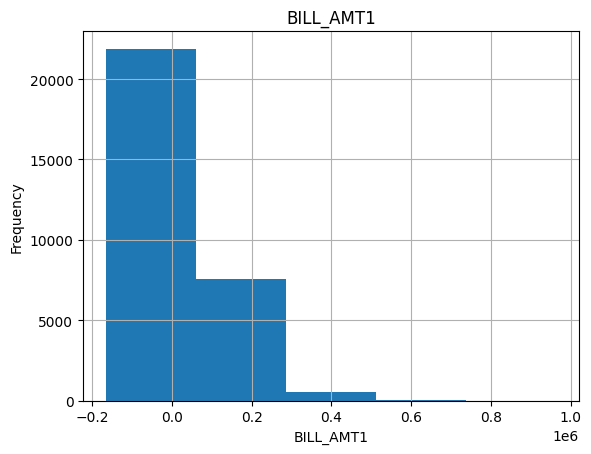

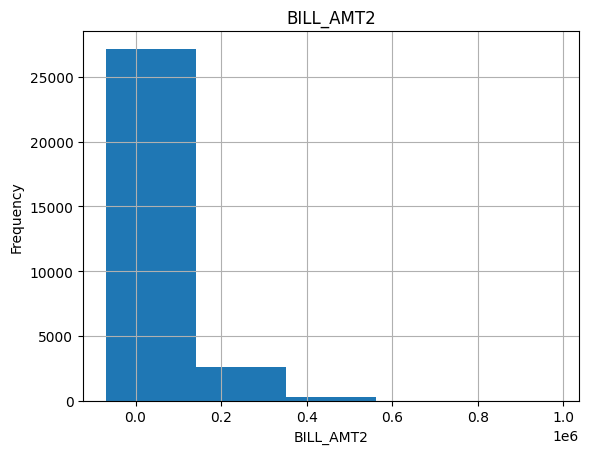

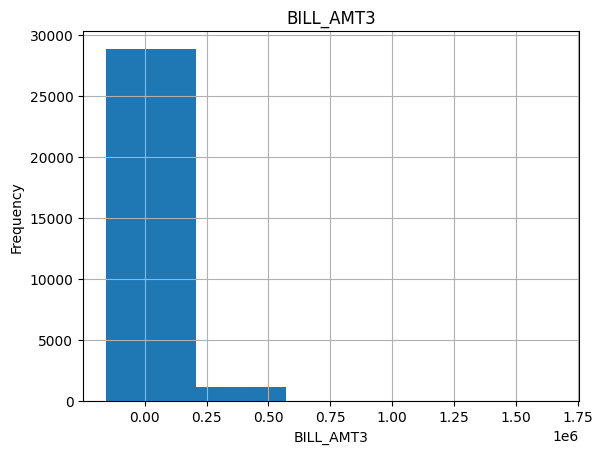

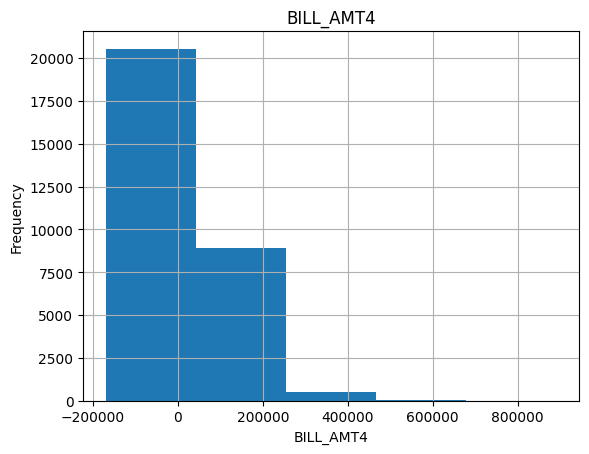

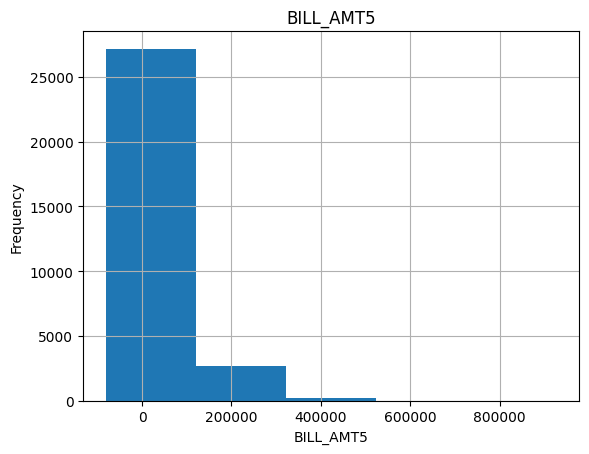

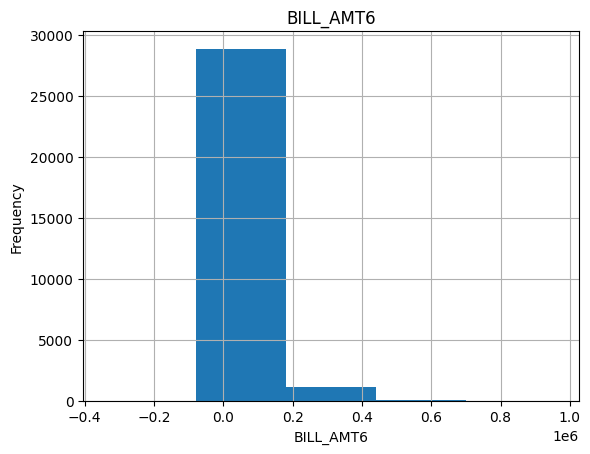

In [7]:
for label in bill_amt_col_labels:
    df_default_credit[label].hist(bins=5)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()

#### 1d.
1. We create a boxplot to show a whisker for each column.
2. We used the seaborn library because it makes nicer boxplots.
3. The boxplot shows that all the columns have several outliers indicated by the dots on either sides of the whiskers. 

/home/ugrad10/zarafat/src/data-mining/.venv/lib64/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ugrad10/zarafat/src/data-mining/.venv/lib64/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ugrad10/zarafat/src/data-mining/.venv/lib64/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ugrad10/zarafat/src/data-mining/.venv/lib64/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

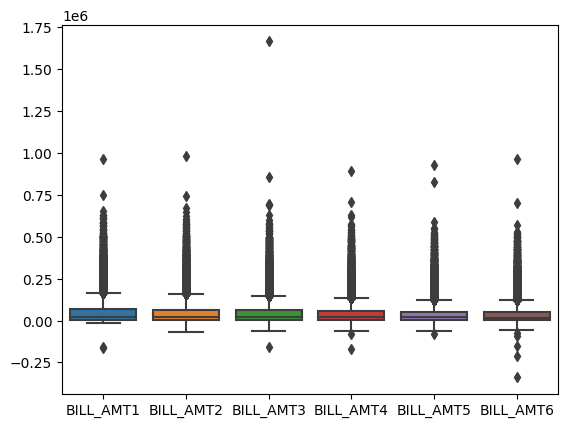

In [8]:
import seaborn as sns 

sns.boxplot(data=df_default_credit[bill_amt_col_labels])
plt.show()

#### 1e.
1. We can create a pretty scatter plot using matplotlib
2. We use some interesting logic to create a list of unique pairs. 
    1. First we iterate through all combinations
    2. For each of them we create a sorted tuple of the pair
    3. Then we turn it into a set which eliminates duplicates.
3. To make the graph more readable
    1. we can take a random sample of 35 from each column.
    2. Vary the color of the markers and add transparency
    3. Vary the shape of the markers
    4. add a legend
    5. For each layer I decreased the transparency by 20 percent so that the top layer doesn't completely oversaturate the others.
4. We can see from this graph that there is a great deal of correlation between the pairs. 
    1. This may indicate that the Bill amount does not vary significantly between months.
    2. The implication of this may be that we can merge all these columns into 1 column to reduce our problem size. 

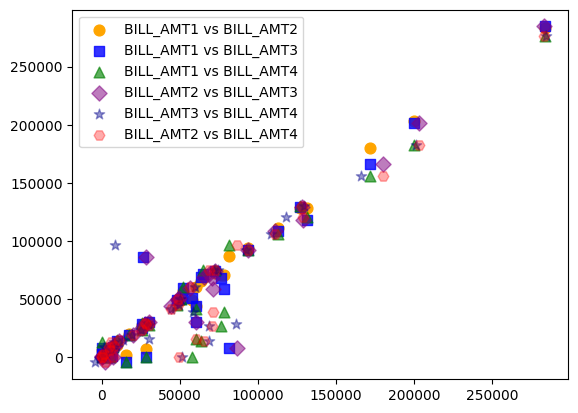

In [9]:
list_of_pairs = []

for labelx in bill_amt_col_labels[:4]:
    for labely in bill_amt_col_labels[:4]:
        if labelx != labely:
            list_of_pairs.append(tuple(sorted((labelx, labely))))

colors = ['orange', 'blue', 'green', 'purple', 'darkblue', 'red']
markers = ['o', 's', '^', 'D', '*', 'H']
alpha_value = 1
colors_markers_pairs = zip(colors, markers, list(set(list_of_pairs)))

for color, marker, labels in colors_markers_pairs:
    x_col = df_default_credit[labels[0]].sample(n=35, random_state=2)
    y_col = df_default_credit[labels[1]].sample(n=35, random_state=2)

    plt.scatter(x_col, y_col, 
                c=color, alpha=alpha_value, marker=marker, s=60,
                label=f'{labels[0]} vs {labels[1]}')
    plt.legend()
    alpha_value *= 0.80
plt.show()


### 2.
#### 2a.
1. first we need to select the columns we want to work on. 
2. then we can standardize them using scikit learn's StandardScaler class

In [10]:
from sklearn.preprocessing import StandardScaler

selected_cols = [df_default_credit.columns[i] for i in [1, 5] + list(range(12, 24))]

scaler = StandardScaler()
df_default_credit[selected_cols] = scaler.fit_transform(df_default_credit[selected_cols])

df_default_credit[selected_cols].head(10)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
5,-0.905498,0.164303,0.178947,0.110856,0.152777,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381
6,2.562830,-0.703588,4.301531,5.098086,5.739063,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207
7,-0.520128,-1.354506,-0.534359,-0.685644,-0.669262,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642
8,-0.211833,-0.812074,-0.542385,-0.492930,-0.503332,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130
9,-1.136720,-0.052670,-0.695642,-0.690983,-0.677929,-0.672497,-0.449114,-0.419118,-0.341942,-0.256990,-0.296801,0.522212,-0.240697,-0.293382


#### 2b.

1. We can easily make a random sample of 1000 using `.sample()`

In [11]:
sample_of_1000 = df_default_credit.sample(n=1000, random_state=2)
sample_of_1000.head(n=10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7945,7946,-1.136720,2,2,1,0.164303,0,0,2,0,...,-0.367578,-0.346788,-0.318938,-0.148740,-0.256990,-0.249660,-0.260188,-0.248683,-0.277519,1
16536,16537,2.562830,1,2,2,-1.029047,0,0,0,0,...,1.350391,1.437387,1.439912,0.020613,0.003639,0.049318,-0.042454,0.014505,-0.048686,0
26726,26727,-0.134759,1,1,2,-1.029047,-2,-1,0,0,...,-0.635812,-0.661907,-0.645672,-0.320206,-0.211808,-0.240005,-0.303594,-0.270937,-0.293382,0
16333,16334,-0.828424,2,2,1,0.055816,0,0,0,0,...,-0.031430,-0.177271,-0.160777,-0.221191,-0.124961,-0.215412,-0.243464,-0.246785,-0.232967,1
20629,20630,0.404759,1,1,2,-0.703588,0,0,0,0,...,-0.299975,-0.270517,-0.255314,-0.256812,-0.195489,-0.221091,-0.261401,-0.247439,-0.234599,0
321,322,1.329647,2,1,2,-0.920561,0,0,0,0,...,1.746649,1.732570,1.081240,0.932284,-0.019972,-0.012818,0.065296,-0.135317,2.519214,0
9579,9580,-0.905498,1,3,1,1.574625,0,0,0,2,...,-0.449388,-0.398075,-0.353294,-0.172890,-0.083382,-0.296801,-0.180397,-0.183229,-0.237130,0
27004,27005,-0.828424,1,1,2,-0.486615,0,0,0,0,...,-0.672497,-0.663059,-0.652724,-0.160815,-0.126784,-0.296801,-0.308063,-0.314136,-0.293382,0
2360,2361,-1.136720,2,2,1,0.598248,-1,2,-1,-1,...,-0.536561,-0.575619,-0.584583,-0.341942,-0.191887,0.199886,-0.308063,-0.314136,-0.199779,0
6593,6594,-0.905498,1,2,2,2.225543,0,0,0,0,...,0.025944,-0.341344,-0.336049,-0.228194,-0.170316,-0.186445,-0.263826,-0.269431,-0.255131,0


#### 2c.
1. First lets split our dataset into two sets based on the label value.
2. Then we can take a sample from each of size 500
3. Finally we merge those samples and we have the results we need. 
4. We also shuffle the new dataset we merged by sampling itself

In [12]:
df_default_credit_0 = df_default_credit[df_default_credit['default payment next month'] == 0]
df_default_credit_1 = df_default_credit[df_default_credit['default payment next month'] == 1]

sampled_0 = df_default_credit_0.sample(n=500, random_state=2)
sampled_1 = df_default_credit_1.sample(n=500, random_state=2)

balanced_sample_1000 = pd.concat([sampled_0, sampled_1], axis=0).sample(frac=1, random_state=2)  

balanced_sample_1000.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
304,305,0.250611,2,1,2,-0.920561,-1,-1,-1,0,...,-0.606558,-0.595883,-0.528230,-0.301792,-0.215324,-0.074840,-0.243336,-0.085049,-0.131377,0
3941,3942,1.869164,2,1,2,-0.161156,1,-1,-1,-2,...,-0.672497,-0.663059,-0.641541,0.480433,-0.256990,-0.296801,-0.308063,-0.270544,-0.293382,1
1830,1831,-1.136720,1,3,1,0.272789,0,0,-1,-1,...,-0.666435,-0.663059,-0.639627,-0.281566,-0.240063,-0.274651,-0.308063,-0.263082,-0.293382,1
2420,2421,0.096463,2,1,2,-0.052670,-1,3,2,0,...,-0.658974,-0.613253,-0.610611,-0.341942,-0.256990,-0.296801,-0.114776,-0.314136,-0.275044,0
6034,6035,0.250611,2,2,1,0.055816,-1,-1,-1,0,...,-0.642403,-0.633928,-0.652724,-0.068561,-0.034685,-0.296801,-0.195014,-0.314136,-0.259406,1


##### 2c - Visualization

1. Pandas has a built in plotting library with a parallel_coordinates library that works with matplotlib.
2. First we select the columns we want to work with
3. Then we can create the plot and customize it

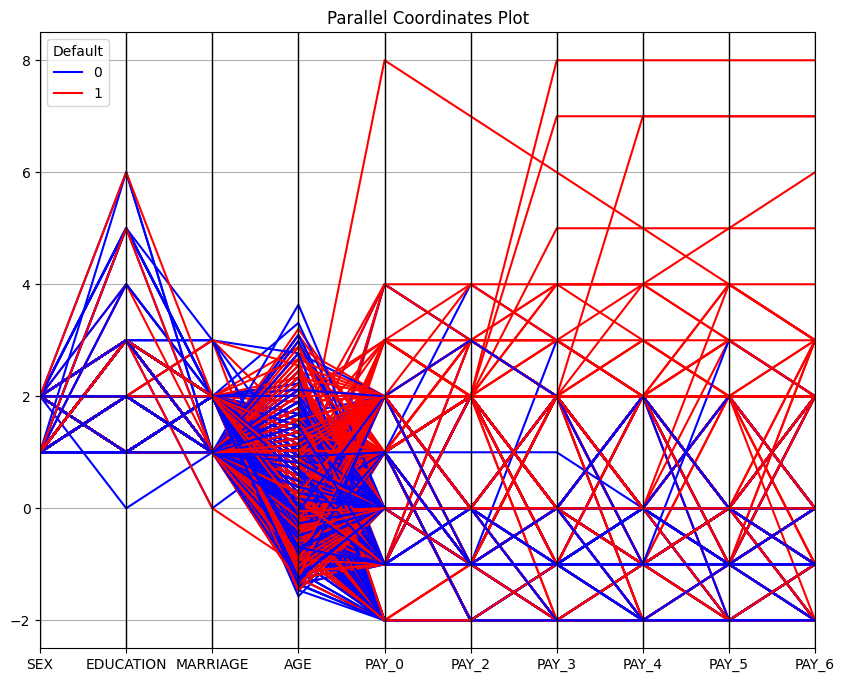

In [13]:
from pandas.plotting import parallel_coordinates

selected_cols = [balanced_sample_1000.columns[i] for i in list(range(2, 12))+[24]]
plt.figure(figsize=(10, 8))
parallel_coordinates(balanced_sample_1000[selected_cols],
                     'default payment next month', 
                     color=['blue', 'red'])
plt.title('Parallel Coordinates Plot')
plt.legend(title='Default')
plt.show()

#### 2d.
1. We already have a balanced sample of 1000
2. Now we can use scikit learn's PCA class to perform pincipal component analysis
3. At the end we combine the projected dataset with the labels and store it in a new variable.
4. now we can begin plotting it.

In [14]:
from sklearn.decomposition import PCA

attributes = balanced_sample_1000.drop(columns=["default payment next month", "ID"])
labels = balanced_sample_1000["default payment next month"]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(attributes)

df_principal = pd.DataFrame(data=principal_components,
                            columns=['PC 1', 'PC 2'])

df_principal_labeled = pd.concat([df_principal, labels.reset_index(drop=True)], 
                                 axis=1)

df_principal_labeled


,PC 1,PC 2,default payment next month
0,-1.603675,-0.766889,0
1,-2.912391,0.313129,1
2,-1.879191,-0.880717,1
3,1.292375,-2.304832,0
4,-2.315521,-0.405323,1
...,...,...,...
995,4.304769,-2.798802,1
996,0.966453,-0.466210,1
997,-1.011304,-0.578056,0
998,1.050118,-0.486183,1


##### 2d - Visualization
1. For the visualization we can split our data based on the label
2. Then we can scatter plot each one in a different color. 
3. Since the scatter plot is so dense we can take a sample of 35 and plot it again to better interpret the data. 
    1. We then doubled the sample size to improve the saturation.
4. From the looks of it there is no clear separation of labels in the new dataset so we may need to rethink our approach to reduce the attributes.
    1. One possible thing to do is increase the output dimensionality on the PCA because going from 23 to 2 might be a bit ambitious with this complex dataset.
    2. Another possible approach is to eliminate some features that might not be useful.

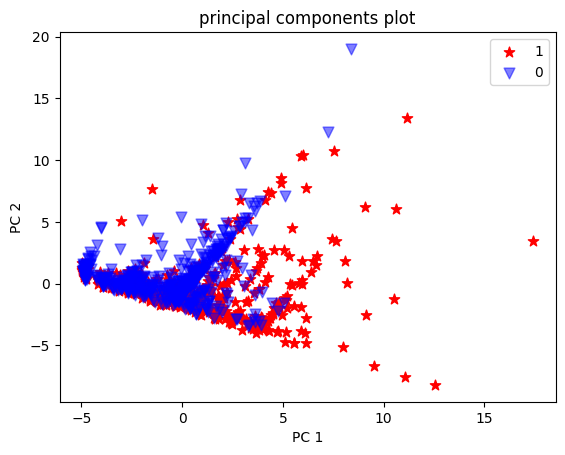

In [15]:
df_principal_labeled_0 = df_principal_labeled[df_principal_labeled['default payment next month'] == 0]
df_principal_labeled_1 = df_principal_labeled[df_principal_labeled['default payment next month'] == 1]

x_col_0 = df_principal_labeled_0['PC 1']
y_col_0 = df_principal_labeled_0['PC 2']

x_col_1 = df_principal_labeled_1['PC 1']
y_col_1 = df_principal_labeled_1['PC 2']

plt.scatter(x_col_1, y_col_1, 
        c='red', alpha=1, marker="*", s=60,
        label='1')

plt.scatter(x_col_0, y_col_0, 
        c='blue', alpha=0.5, marker="v", s=60,
        label='0')
plt.legend()
plt.title('principal components plot')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [16]:
df_principal_labeled_0 = df_principal_labeled[df_principal_labeled['default payment next month'] == 0]
df_principal_labeled_1 = df_principal_labeled[df_principal_labeled['default payment next month'] == 1]

df_principal_labeled_0 = df_principal_labeled_0.sample(n=35*2, random_state=42)
df_principal_labeled_1 = df_principal_labeled_1.sample(n=35*2, random_state=42)

x_col_0 = df_principal_labeled_0['PC 1']
y_col_0 = df_principal_labeled_0['PC 2']

x_col_1 = df_principal_labeled_1['PC 1']
y_col_1 = df_principal_labeled_1['PC 2']

plt.scatter(x_col_1, y_col_1, 
        c='red', alpha=1, marker="*", s=60,
        label='1')

plt.scatter(x_col_0, y_col_0, 
        c='blue', alpha=0.5, marker="v", s=60,
        label='0')
plt.legend()
plt.title('principal components plot')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2897123159.py, line 14)